In [450]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Generate 2d gaussian distributions:

Take in centre of distribution, variance of data, and the number of points then return a matrix of size (num_points,2)

In [451]:
def getDistribution(centre, var, num_points):
    data_points = np.random.normal(scale = var,size = (num_points,2))
    data_points = data_points + centre
    return data_points

# Initialise data required:

Hyper parameters:

In [452]:
learning_rate = 0.01
total_iterations = 1000
terminating_constant = 0.001

In [453]:
variance = 1

centre0 = np.array([1,-1])
centre1 = np.array([-1,1])

points0 = getDistribution(centre0, variance, 20)
points1 = getDistribution(centre1, variance, 20)
valid_points0 = getDistribution(centre0, variance, 20)
valid_points1 = getDistribution(centre1, variance, 20)
test_points0 = getDistribution(centre0, variance, 20)
test_points1 = getDistribution(centre1, variance, 20)

values0 = np.zeros(20)
values1 = np.full(20,1.0)
valid_values0 = np.zeros(20)
valid_values1 = np.full(20,1.0)
test_values0 = np.zeros(20)
test_values1 = np.full(20,1.0)

points_all = np.concatenate((points0,points1))    
values_all = np.append(values0,values1)
valid_points_all = np.concatenate((valid_points0,valid_points1))    
valid_values_all = np.append(valid_values0,valid_values1)
test_points_all = np.concatenate((test_points0,test_points1))    
test_values_all = np.append(test_values0,test_values1)

# Plot points:

Plot data with variance 1 then 3 and then random means/variances

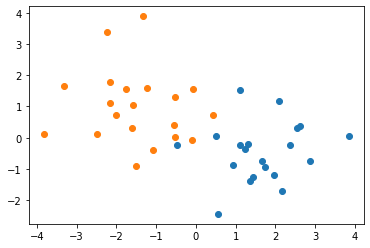

In [454]:
plt.plot(points0[:,0],points0[:,1],'o')
plt.plot(points1[:,0],points1[:,1],'o')
plt.show()

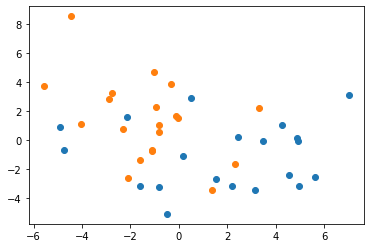

In [455]:
var3_points0 = getDistribution(centre0, 3, 20)
var3_points1 = getDistribution(centre1, 3, 20)

plt.plot(var3_points0[:,0],var3_points0[:,1],'o')
plt.plot(var3_points1[:,0],var3_points1[:,1],'o')
plt.show()

meanX = 3 meanY = 9 variance = 1


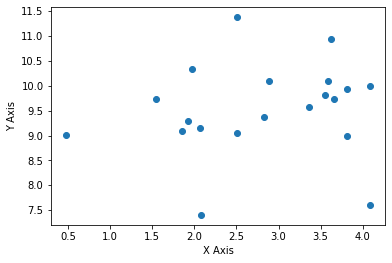

meanX = -4 meanY = -6 variance = 3


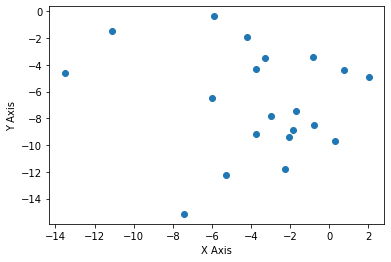

meanX = -4 meanY = -3 variance = 1


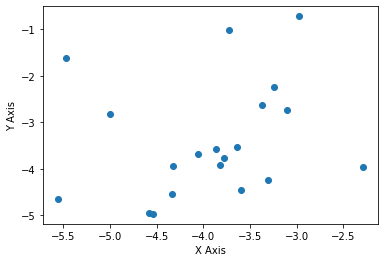

meanX = 3 meanY = 5 variance = 2


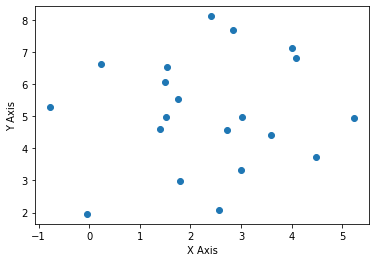

meanX = 9 meanY = 8 variance = 1


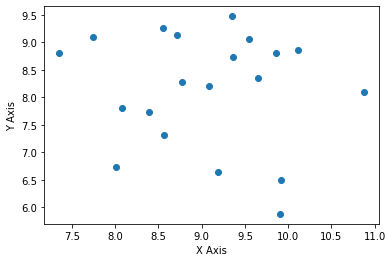

meanX = -4 meanY = -9 variance = 1


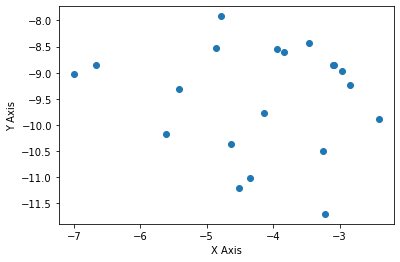

meanX = -5 meanY = 1 variance = 2


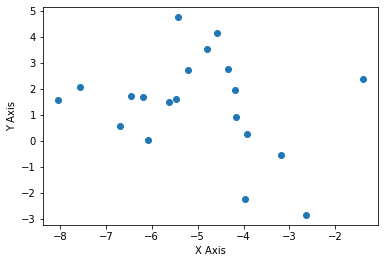

meanX = -9 meanY = -7 variance = 1


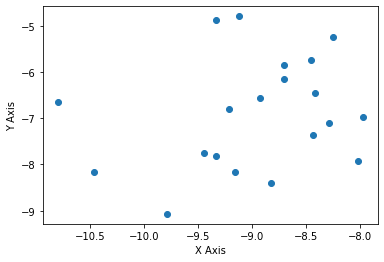

meanX = 5 meanY = 3 variance = 3


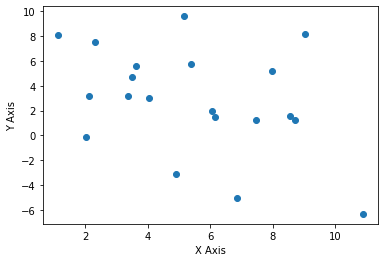

meanX = 3 meanY = 0 variance = 1


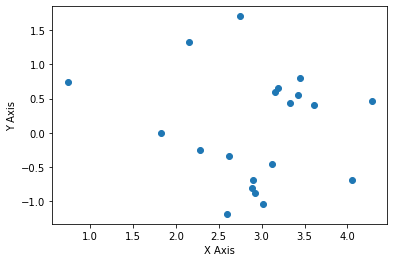

In [456]:
for i in range(10):
    meanX = np.random.randint(-10,10)
    meanY = np.random.randint(-10,10)
    variance = np.random.randint(1,4)
    tempDist = np.array([meanX, meanY])
    tempPoint =getDistribution(tempDist,variance,20)
    plt.plot(tempPoint[:,0],tempPoint[:,1],'o')
    plt.ylabel('Y Axis')
    plt.xlabel('X Axis')
    print("meanX = " + str(meanX) + " meanY = " + str(meanY) + " variance = " + str(variance))
    plt.show()

# Initialise weights:

In [457]:
weights = np.random.uniform(low=-0.5, high=0.5, size=(3,))

In [458]:
def reinitialiseWeights():
    return np.random.uniform(low=-0.5, high=0.5, size=(3,))

# Error of random classifier:

Define and call functions to display error in terms of log-likelihood error function, and a confusion matrix

In [459]:
def weightsDotFeatures(features):
    dotProduct = np.dot(features, weights[1:])+weights[0];
    return dotProduct

In [460]:
def hX(features):
    dotP = weightsDotFeatures(features)
    h = 1/(1+math.exp((-1)*dotP))
    return h

In [461]:
def probYGivenX(data_point, y_value):
    return (hX(data_point)**y_value)*((1-hX(data_point))**(1-y_value))

In [462]:
def likelihood(all_data_points, y_values):
    curr_likelihood = 1
    for i in range(len(all_data_points)):
        curr_data_points = all_data_points[i]
        curr_y_value = y_values[i]
        curr_prob = probYGivenX(curr_data_points,curr_y_value)
        curr_likelihood = curr_likelihood*curr_prob
        
    return curr_likelihood

In [463]:
def logLikelihood(all_data_points, y_values):
    return np.log(likelihood(all_data_points, y_values))

In [464]:
def errorLogLikelihood(all_data_points, y_values):
    return -1*logLikelihood(all_data_points, y_values)

In [465]:
def getPrediction(features):
    prob = hX(features)
    if prob >= 0.5:
        return 1
    else:
        return 0

In [466]:
def getConfusionMatrix(all_data_points, y_values):
    confusionMatrix = np.array([["","Actual 0:","Actual 1:"],
                                ["Predict 0:", 0, 0],
                                ["Predict 1:", 0, 0]])
    
    for i in range(len(all_data_points)):
        curr_data_point = all_data_points[i]
        curr_y_value = int(y_values[i])
        predict_y_value = getPrediction(curr_data_point)
        
        confusionMatrix[predict_y_value+1][curr_y_value+1] = int(confusionMatrix[predict_y_value+1][curr_y_value+1]) + 1
            
    return confusionMatrix

In [467]:
#Testing weights accuracy
def weightsAccuracy(points, values):
    num_correct = 0.0
    total_points = len(points)
    for i in range(total_points):
        prediction = getPrediction(points[i])
        curr_value = values[i]
        if prediction == curr_value:
            num_correct = num_correct + 1
        
        
    return float(num_correct/total_points)*100

In [468]:
weights = reinitialiseWeights()
logLikelihoodErr = errorLogLikelihood(points_all,values_all)
confusionMatrix = getConfusionMatrix(points_all,values_all)

print("Errors without training:\n")
print("Log-likelihood error:",logLikelihoodErr)
print("\nConfusion matrix:\n", confusionMatrix)

Errors without training:

Log-likelihood error: 17.309659192228956

Confusion matrix:
 [['' 'Actual 0:' 'Actual 1:']
 ['Predict 0:' '19' '1']
 ['Predict 1:' '1' '19']]


# Learn weights:

First cycle through all data points once and update weights, then run through data_points until the terminating condition is met and compare errors

In [469]:
def updateWeights(curr_features, feature_value, weights):
    new_weights = np.zeros(len(weights))
    for i in range(len(weights)):
        new_weight = weights[i]
        derivative = learning_rate*(hX(curr_features)-feature_value)
        if i==0:
            new_weight = weights[i]-derivative
        else:
            new_weight = weights[i]-derivative*curr_features[i-1]
        new_weights[i] = new_weight        
    return new_weights

In [470]:
def learnWeightsOneCycle(weights):
    for i in range(len(points_all)):
        curr_point_feature = points_all[i]
        curr_value = values_all[i]
        weights = updateWeights(curr_point_feature, curr_value, weights)
        
    return weights

In [471]:
def learnWeights(weights):
    counter = 0
    weight_diff = np.array([1,1,1])
    while counter<total_iterations and np.linalg.norm(weight_diff)>=terminating_constant:
        for i in range(len(points_all)):
            curr_point_feature = points_all[i]
            curr_value = values_all[i]
            new_weights = updateWeights(curr_point_feature,curr_value, weights)
            counter = counter + 1
            weight_diff = new_weights - weights
            weights = new_weights
            if np.linalg.norm(weight_diff)<terminating_constant:
                break
                
    return weights

In [472]:
weights = reinitialiseWeights()

#Train with 1 cycle through data
weights = learnWeightsOneCycle(weights)
logLikelihoodErr = errorLogLikelihood(points_all,values_all)
confusionMatrix = getConfusionMatrix(points_all,values_all)
accuracy = weightsAccuracy(points_all,values_all)

print("Errors with one cycle of training:\n")
print("Log-likelihood error:",logLikelihoodErr)
print("\nConfusion matrix:\n", confusionMatrix)
print("\n Accuracy: ",accuracy)

#Train till convergence
weights = learnWeights(weights)
logLikelihoodErr = errorLogLikelihood(points_all,values_all)
confusionMatrix = getConfusionMatrix(points_all,values_all)
accuracy = weightsAccuracy(points_all,values_all)

print("\n------------------------------\n")

print("Errors with all of training:\n")
print("Log-likelihood error:",logLikelihoodErr)
print("\nConfusion matrix:\n", confusionMatrix)
print("\n Accuracy: ",accuracy)

Errors with one cycle of training:

Log-likelihood error: 23.309192354230625

Confusion matrix:
 [['' 'Actual 0:' 'Actual 1:']
 ['Predict 0:' '9' '1']
 ['Predict 1:' '11' '19']]

 Accuracy:  70.0

------------------------------

Errors with all of training:

Log-likelihood error: 4.829080981780752

Confusion matrix:
 [['' 'Actual 0:' 'Actual 1:']
 ['Predict 0:' '19' '2']
 ['Predict 1:' '1' '18']]

 Accuracy:  92.5


# Compare validation data to training data: 

In [473]:
#Training data errors and accuracy
logLikelihoodErr = errorLogLikelihood(points_all,values_all)
confusionMatrix = getConfusionMatrix(points_all,values_all)
accuracy = weightsAccuracy(points_all,values_all)

print("Errors with training data:\n")
print("Log-likelihood error:",logLikelihoodErr)
print("\nConfusion matrix:\n", confusionMatrix)
print("\n Accuracy: ",accuracy)

#Validation data errors and accuracy
logLikelihoodErr = errorLogLikelihood(valid_points_all,valid_values_all)
confusionMatrix = getConfusionMatrix(valid_points_all,valid_values_all)
accuracy = weightsAccuracy(valid_points_all,valid_values_all)

print("\n------------------------------\n")

print("Errors with validation data:\n")
print("Log-likelihood error:",logLikelihoodErr)
print("\nConfusion matrix:\n", confusionMatrix)
print("\n Accuracy: ",accuracy)

Errors with training data:

Log-likelihood error: 4.829080981780752

Confusion matrix:
 [['' 'Actual 0:' 'Actual 1:']
 ['Predict 0:' '19' '2']
 ['Predict 1:' '1' '18']]

 Accuracy:  92.5

------------------------------

Errors with validation data:

Log-likelihood error: 14.73904687146666

Confusion matrix:
 [['' 'Actual 0:' 'Actual 1:']
 ['Predict 0:' '17' '3']
 ['Predict 1:' '3' '17']]

 Accuracy:  85.0


# Final performance on testing data:

In [474]:
logLikelihoodErr = errorLogLikelihood(test_points_all,test_values_all)
confusionMatrix = getConfusionMatrix(test_points_all,test_values_all)
accuracy = weightsAccuracy(test_points_all,test_values_all)

print("Errors and accuracy with testing data:\n")
print("Log-likelihood error:",logLikelihoodErr)
print("\nConfusion matrix:\n", confusionMatrix)
print("\n Accuracy: ",accuracy)

Errors and accuracy with testing data:

Log-likelihood error: 0.520001726896199

Confusion matrix:
 [['' 'Actual 0:' 'Actual 1:']
 ['Predict 0:' '20' '0']
 ['Predict 1:' '0' '20']]

 Accuracy:  100.0
